# SVM Classifier for Spam Classification

In [11]:
import sklearn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

def readMatrix(file):
    # Use the code below to read files
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def train(matrix_train,y_train):
    clf = LinearSVC(random_state=0,max_iter =100000)
    clf1 = clf.fit(matrix_train,y_train)
    return clf1

def test(clf,matrix_test):
    output = clf.predict(matrix_test)
    return output

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = float((output != label).sum()) * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error))
    return error*100

In [5]:
# Note1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
# Note2: Spam emails are denoted as class 1, and non-spam ones as class 0.
# Note3: The shape of the data matrix (document matrix): (number of emails) by (number of tokens)

# Load files
dataMatrix_train, tokenlist, category_train = readMatrix('MATRIX.TRAIN')
dataMatrix_test, tokenlist, category_test = readMatrix('MATRIX.TEST')

# Train
clf = train(dataMatrix_train,category_train)

# Test and evluate
prediction = np.ones(dataMatrix_test.shape[0])
prediction = test(clf,dataMatrix_test)
evaluate(prediction, category_test)

Error: 0.3750%


0.375

# Testing with Different Sizes of Training Data

In [6]:
dataMatrix_test, tokenlist, category_test = readMatrix('MATRIX.TEST')
file = ['MATRIX.TRAIN.50','MATRIX.TRAIN.100','MATRIX.TRAIN.200','MATRIX.TRAIN.400',
        'MATRIX.TRAIN.800','MATRIX.TRAIN.1400']
err=[]
for filename in file:
    dataMatrix_train, tokenlist, category_train = readMatrix(filename)
    clf = train(dataMatrix_train,category_train)
    prediction = test(clf,dataMatrix_test)
    err = np.append(err,evaluate(prediction, category_test))

Error: 5.0000%
Error: 3.0000%
Error: 1.2500%
Error: 1.0000%
Error: 1.0000%
Error: 0.8750%


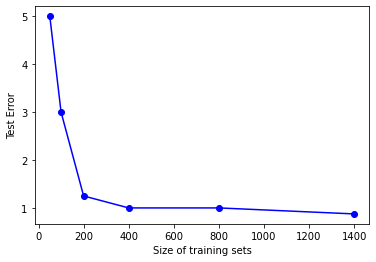

In [7]:
num =np.array([50,100,200,400,800,1400])
plt.plot(num,err,color="Blue")
plt.scatter(num,err,color="Blue")
plt.xlabel('Size of training sets')
plt.ylabel('Test Error')
plt.show()